In [35]:
import warnings
warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time

In [36]:
#选取BTCUSDT：binance为数据对象，并添加freq参数
start = time()
path = r'C:\Users\风袖\Downloads\min_data\VnTrader_1Min_Db'
props = {'fields':'high,low,close,open,volume',
         'symbol': 'BTCUSDT:binance',
         'freq':'30min,1h',
         'start_date': 20180601000000}

Time_dict = ds.bar_reader(path, props)#读取数据

In [37]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()
dv1h.create_init_dv(Time_dict['1h'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [38]:
dv1h.get_ts('close',date_type='datetime').head()

symbol,BTCUSDT:binance
trade_date,
2018-06-01 00:00:00,7551.99
2018-06-01 01:00:00,7590.00
2018-06-01 02:00:00,7557.09
2018-06-01 03:00:00,7544.90
2018-06-01 04:00:00,7540.04


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#以KDJ为对象
def Plot_Mean(dv, KDJ_K_A, KDJ_D_A, KDJ_J_A, chart_name='KDJ',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:], alpha=0.4)
    ax1.plot(KDJ_D_A.iloc[n:], alpha=0.4)
    ax1.plot(KDJ_J_A.iloc[n:], alpha=0.4)
    ax1.hlines(0, RSV.iloc[n:].index[0], RSV.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

def SMA(A,n,m):
        # 设置alpha的比例
        alpha = m/n
        #通过ewm计算递归函数
        return A.ewm(alpha=alpha, adjust=False).mean()
dv1h.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1h.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,0.350145


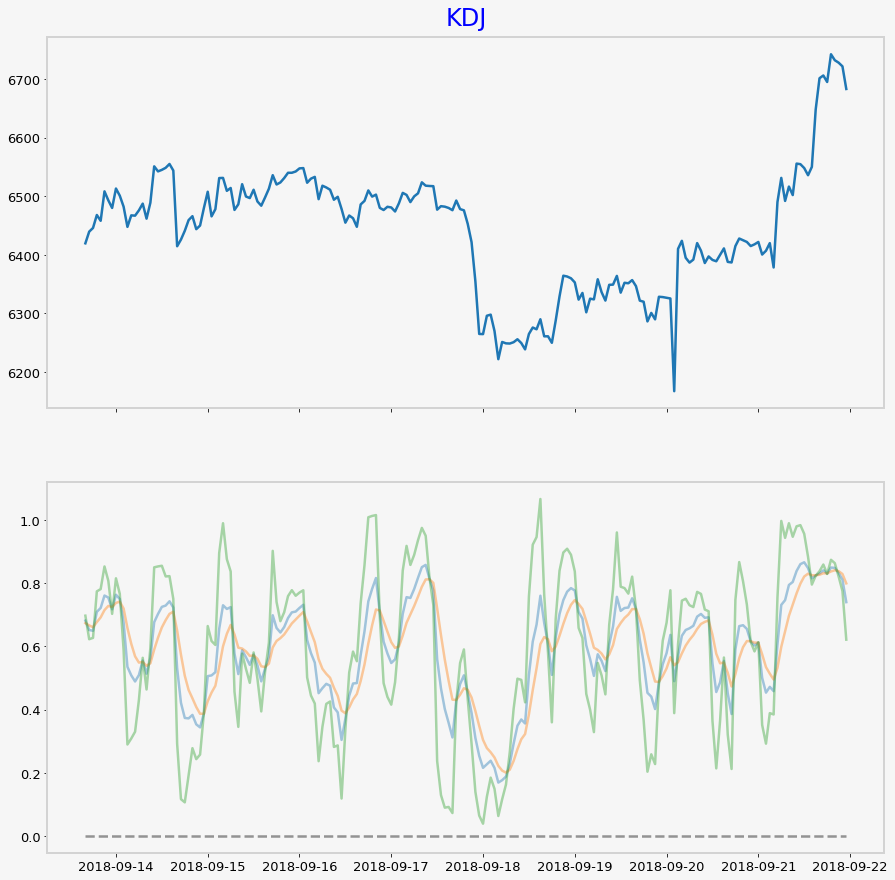

In [41]:
KDJ_K_A = dv1h.get_ts('KDJ_K_A', date_type='datetime')
KDJ_D_A = dv1h.get_ts('KDJ_D_A', date_type='datetime')
KDJ_J_A = dv1h.get_ts('KDJ_J_A', date_type='datetime')
RSV = dv1h.get_ts('RSV', date_type='datetime')

Plot_Mean(dv1h, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0], n=-200)

In [42]:
#进出场假设：

#短线由下向上穿过长线，卖出信号

#长线由下向上穿过短线，买入信号

In [43]:
# 进场信号
long = dv1h.add_formula("longKDJ","If((Ts_Mean(KDJ_K_A,20)>Ts_Mean(KDJ_D_A,20) && (Delay(Ts_Mean(KDJ_K_A,20)<Ts_Mean(KDJ_D_A,20),1)),2,0))", add_data=True)
short = dv1h.add_formula("shortKDJ","If((Ts_Mean(KDJ_K_A,20)<Ts_Mean(KDJ_D_A,20) && (Delay(Ts_Mean(KDJ_K_A,20)>Ts_Mean(KDJ_D_A,20),1)),-2,0))", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLongKDJ","If(shortKDJ==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShortKDJ","If(longKDJ==2,-1,0)", add_data=True)

In [44]:
#计算绩效
from jaqs_fxdayu.research import TimingDigger
Statistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='Statistic')

def TimingSignal(td, dv, mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称


    #多空分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts("longKDJ"),
        exit_signal=dv.get_ts("closeLongKDJ"),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("shortKDJ"),
        exit_signal=dv.get_ts("closeShortKDJ"),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(Statistic, dv1h, 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%


In [45]:
Statistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat               8.100   -8.286    1.648
p-value              0.000    0.000    0.101
mean                 0.021   -0.012    0.003
std                  0.023    0.014    0.025
info_ratio           0.894   -0.829    0.122
skewness             2.060   -3.009    1.075
kurtosis             5.671   12.061    5.634
pct5                 0.001   -0.037   -0.028
pct25                0.004   -0.014   -0.008
pct50                0.012   -0.007   -0.001
pct75                0.032   -0.003    0.009
pct95                0.055   -0.001    0.047
occurance           83.000  101.000  184.000
win_ratio              NaN      NaN    0.451
win_mean/loss_mean     NaN      NaN    1.792


In [46]:
#获得胜率为0.451，大于0.4，表现尚可
#下面进行对EOSUSDT：binance得测试

In [47]:
#选取EOSUSDT：binance为数据对象，并添加freq参数
start = time()
path = r'C:\Users\风袖\Downloads\min_data\VnTrader_1Min_Db'
props = {'fields':'high,low,close,open,volume',
         'symbol': 'EOSUSDT:binance',
         'freq':'30min,1h',
         'start_date': 20180601000000}

Time_dict = ds.bar_reader(path, props)#读取数据

In [48]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()
dv1h.create_init_dv(Time_dict['1h'].dropna().set_index(["trade_date","symbol"]))
dv1h.get_ts('close',date_type='datetime').head()

Initialize dataview success.


symbol,EOSUSDT:binance
trade_date,
2018-06-01 00:00:00,12.2821
2018-06-01 01:00:00,12.6442
2018-06-01 02:00:00,12.6272
2018-06-01 03:00:00,12.4861
2018-06-01 04:00:00,12.4473


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#以KDJ为对象
def Plot_Mean(dv, KDJ_K_A, KDJ_D_A, KDJ_J_A, chart_name='KDJ',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:], alpha=0.4)
    ax1.plot(KDJ_D_A.iloc[n:], alpha=0.4)
    ax1.plot(KDJ_J_A.iloc[n:], alpha=0.4)
    ax1.hlines(0, RSV.iloc[n:].index[0], RSV.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

def SMA(A,n,m):
        # 设置alpha的比例
        alpha = m/n
        #通过ewm计算递归函数
        return A.ewm(alpha=alpha, adjust=False).mean()
dv1h.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1h.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)

symbol,EOSUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,0.256903


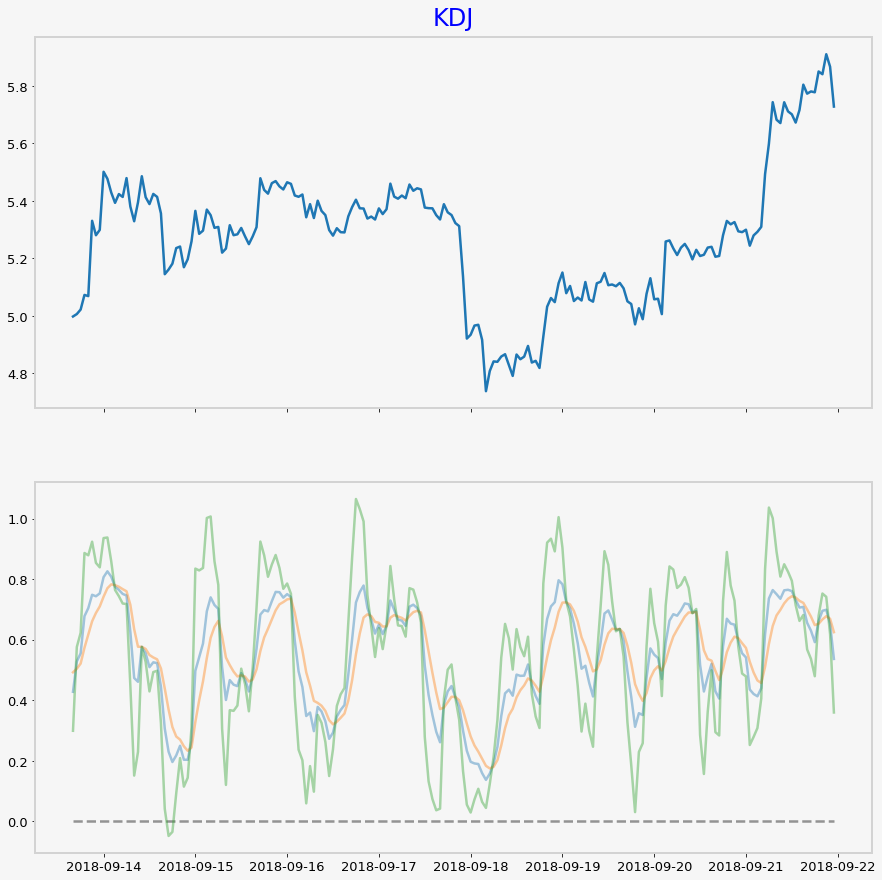

In [51]:
KDJ_K_A = dv1h.get_ts('KDJ_K_A', date_type='datetime')
KDJ_D_A = dv1h.get_ts('KDJ_D_A', date_type='datetime')
KDJ_J_A = dv1h.get_ts('KDJ_J_A', date_type='datetime')
RSV = dv1h.get_ts('RSV', date_type='datetime')

Plot_Mean(dv1h, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0], n=-200)

In [52]:
# 进场信号
long = dv1h.add_formula("longKDJ","If((Ts_Mean(KDJ_K_A,20)>Ts_Mean(KDJ_D_A,20) && (Delay(Ts_Mean(KDJ_K_A,20)<Ts_Mean(KDJ_D_A,20),1)),2,0))", add_data=True)
short = dv1h.add_formula("shortKDJ","If((Ts_Mean(KDJ_K_A,20)<Ts_Mean(KDJ_D_A,20) && (Delay(Ts_Mean(KDJ_K_A,20)>Ts_Mean(KDJ_D_A,20),1)),-2,0))", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLongKDJ","If(shortKDJ==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShortKDJ","If(longKDJ==2,-1,0)", add_data=True)

In [53]:
#计算绩效
from jaqs_fxdayu.research import TimingDigger
Statistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='Statistic')

def TimingSignal(td, dv, mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称


    #多空分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts("longKDJ"),
        exit_signal=dv.get_ts("closeLongKDJ"),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("shortKDJ"),
        exit_signal=dv.get_ts("closeShortKDJ"),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(Statistic, dv1h, 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%


In [54]:
Statistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat               7.933  -10.067    0.374
p-value              0.000    0.000    0.709
mean                 0.042   -0.027    0.001
std                  0.046    0.028    0.050
info_ratio           0.898   -0.947    0.027
skewness             2.045   -1.690    1.161
kurtosis             4.637    2.537    4.302
pct5                 0.001   -0.091   -0.076
pct25                0.010   -0.035   -0.019
pct50                0.027   -0.018   -0.003
pct75                0.058   -0.007    0.019
pct95                0.110   -0.001    0.086
occurance           79.000  114.000  193.000
win_ratio              NaN      NaN    0.409
win_mean/loss_mean     NaN      NaN    1.566


In [55]:
#获得胜率为0.409，大于0.4，表现尚可